<a href="https://colab.research.google.com/github/Aditya-titus/Machine-learning/blob/main/Example_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical example of unsupervised learning

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from google.colab import drive, files

Reading files

In [6]:
# Reading file
drive.mount('/content/gdrive')
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/volts.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### 1) Finding clusters from output data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[3.19462558 1.91429061]
 [7.19831173 7.70619219]
 [2.88507126 6.39672699]]


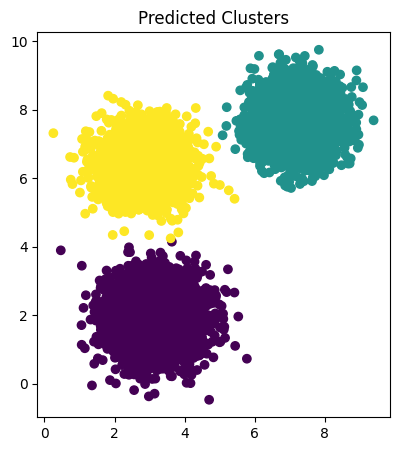

In [28]:
# Extract the input features (x1 and x2) and the output features (y1 and y2)
X = data[['x1', 'x2']]
y = data[['y1', 'y2']]
input = np.array(X)
output = np.array(y)


# Generating random datasets
km = KMeans(n_clusters = 3)
output_clusters = km.fit_predict(output)
z = np.array(output_clusters)

# Create a scatter plot for predicted clusters
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(output[:, 0], output[:, 1], c=output_clusters, cmap='viridis')
plt.title("Predicted Clusters")


# Get the cluster centers
cluster_centers = km.cluster_centers_

# Print the cluster centers
center_values = []
for i, center in enumerate(cluster_centers):
    y1_center, y2_center = center
    center_values.append(center)
    # print(f"Center {i + 1}: [y1={y1_center:.2f}V, y2={y2_center:.2f}V]")

Output_voltage_values = np.array(center_values)
print(Output_voltage_values)



### 2) Random forrest to predict output from input values

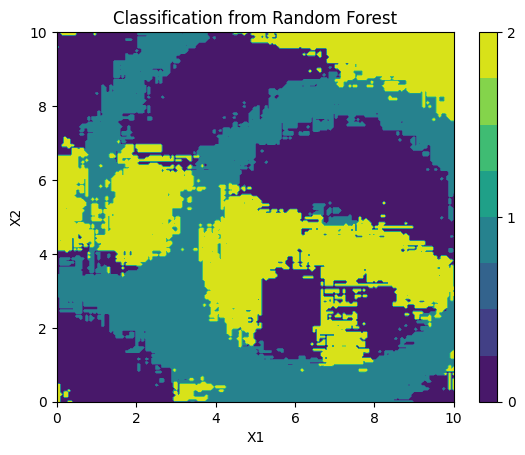

In [29]:
# Random forest for voltage classification
def gen_sample_grid(npx=200, npy=200, limit1=0, limit2=10):
  x1line = np.linspace(limit1, limit2, npx)
  x2line = np.linspace(limit1, limit2, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line


# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
rf.fit(input, z)


Xgrid,x1line,x2line = gen_sample_grid(200,200,0, 10)

prob = rf.predict(Xgrid)
prob_plot = prob.reshape(200,200)

# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
plt.contourf(x1line,x2line,prob_plot)
cbar = plt.colorbar()
cbar.set_ticks([0, 1, 2])

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Classification from Random Forest')
plt.show()
# # Predict the class labels for the test data
# z_pred = rf_classifier.predict(X_test)

# # Calculate the accuracy of the classifier
# accuracy = accuracy_score(z_test, z_pred)
# print(f"Accuracy: {accuracy * 100:.2f}%")

### 3) Nearest neighbour approach

Text(0.5, 1.0, 'Decision boundary from Nearest Neighbour')

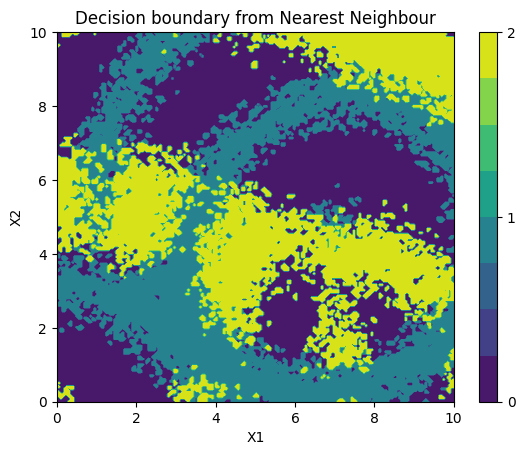

In [31]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(input, z)

Xgrid,x1line,x2line = gen_sample_grid(200,200,0, 10)

prob = knn.predict(Xgrid)
prob_plot = prob.reshape(200,200)

plt.contourf(x1line,x2line,prob_plot)
cbar = plt.colorbar()
cbar.set_ticks([0, 1, 2])

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision boundary from Nearest Neighbour')